In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=6cd4d21d7d4da2c092997fa837e1aabe8ee6d5f21270c0efe43ee493a62fe33d
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import pickle
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
def dim_red(mat, p, method):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list
        p : number of dimensions to keep
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    if method=='ACP':
        pca = PCA(n_components=p)
        red_mat = pca.fit_transform(mat)

    elif method=='TSNE':
        tsne = TSNE(n_components=p)
        red_mat = tsne.fit_transform(mat)

    elif method=='UMAP':
        reducer = umap.UMAP(n_components=p)
        red_mat= reducer.fit_transform(mat)

    else:
        raise Exception("Please select one of the three methods: ACP, AFC, UMAP")

    return red_mat

def clust(mat, k, method='kmeans'):
    '''
    Perform clustering

    Input:
    -----
        mat : input list
        k : number of clusters
        method : clustering method ('kmeans', 'agglomerative', 'dbscan')
    Output:
    ------
        pred : list of predicted labels
    '''
    if method == 'kmeans':
        model = KMeans(n_clusters=k, random_state=42)
    elif method == 'agglomerative':
        model = AgglomerativeClustering(n_clusters=k)
    elif method == 'dbscan':
        model = DBSCAN(eps=0.5, min_samples=5)
    else:
        raise ValueError("Invalid clustering method. Supported methods are kmeans, agglomerative, and dbscan.")

    pred = model.fit_predict(mat)

    return pred

def plot_dimensionality_reduction(embeddings, labels, method, title):
    if method == 'ACP':
        red_emb = dim_red(embeddings, 2, 'ACP')
    elif method == 'UMAP':
        red_emb = dim_red(embeddings, 2, 'UMAP')
    elif method == 'TSNE':
        red_emb = dim_red(embeddings, 2, 'TSNE')
    else:
        raise ValueError("Invalid method. Supported methods are ACP, UMAP, and TSNE.")

    df = pd.DataFrame({'Component 1': red_emb[:, 0], 'Component 2': red_emb[:, 1], 'Label': labels})

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Component 1', y='Component 2', hue='Label', data=df, palette='viridis', s=60, alpha=0.8)
    plt.title(title)
    plt.show()

def save_data(embeddings, red_emb, labels, pred, method, clustering_method):
    # Save data to files using pickle
    with open('embeddings.pkl', 'wb') as file:
        pickle.dump(embeddings, file)

    with open('reduced_embeddings.pkl', 'wb') as file:
        pickle.dump(red_emb, file)

    with open('labels.pkl', 'wb') as file:
        pickle.dump(labels, file)

    with open(f'predicted_labels_{method}_{clustering_method}.pkl', 'wb') as file:
        pickle.dump(pred, file)

def load_data():
    # Load data from pickle files
    with open('embeddings.pkl', 'rb') as file:
        embeddings = pickle.load(file)

    with open('reduced_embeddings.pkl', 'rb') as file:
        red_emb = pickle.load(file)

    with open('labels.pkl', 'rb') as file:
        labels = pickle.load(file)

    return embeddings, red_emb, labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Method: ACP, Clustering Method: kmeans
NMI: 0.04 
ARI: 0.00

Method: ACP, Clustering Method: agglomerative
NMI: 0.04 
ARI: 0.00

Method: ACP, Clustering Method: dbscan
NMI: 0.03 
ARI: -0.00



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Method: TSNE, Clustering Method: kmeans
NMI: 0.04 
ARI: 0.00

Method: TSNE, Clustering Method: agglomerative
NMI: 0.04 
ARI: 0.00

Method: TSNE, Clustering Method: dbscan
NMI: 0.03 
ARI: -0.00



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Method: UMAP, Clustering Method: kmeans
NMI: 0.04 
ARI: 0.00

Method: UMAP, Clustering Method: agglomerative
NMI: 0.04 
ARI: 0.00

Method: UMAP, Clustering Method: dbscan
NMI: 0.03 
ARI: -0.00



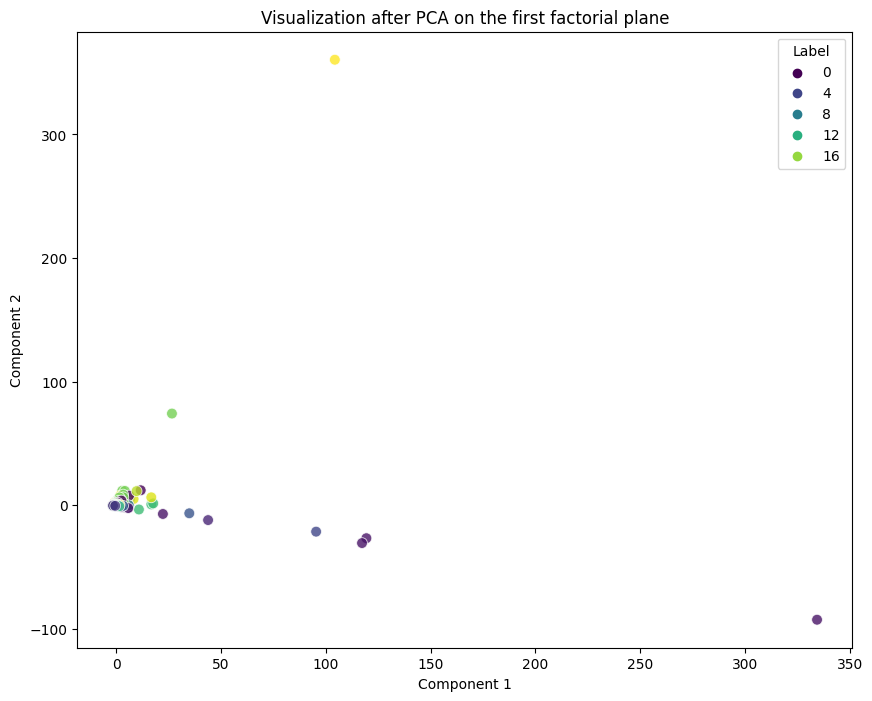

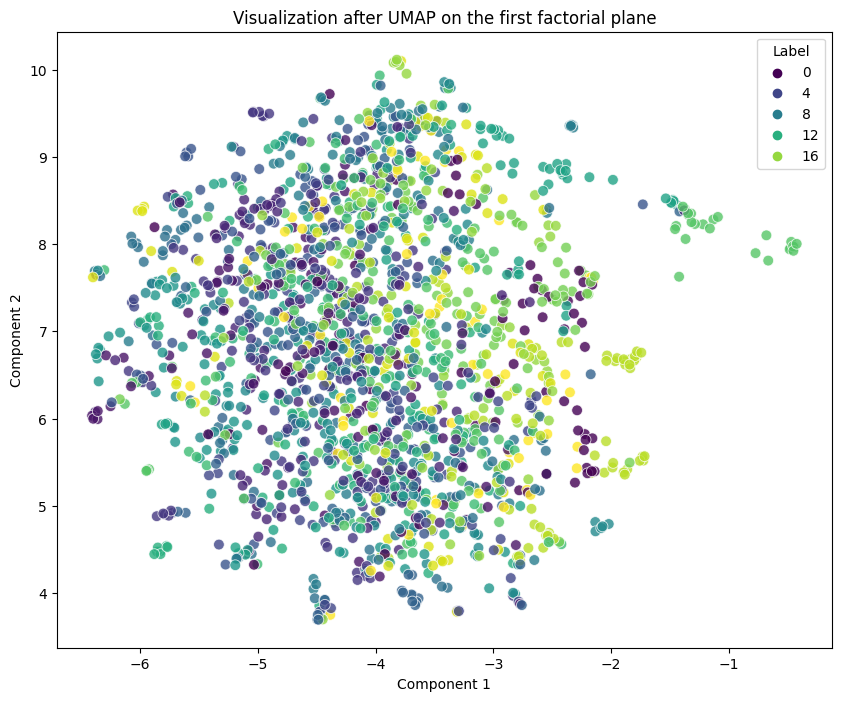

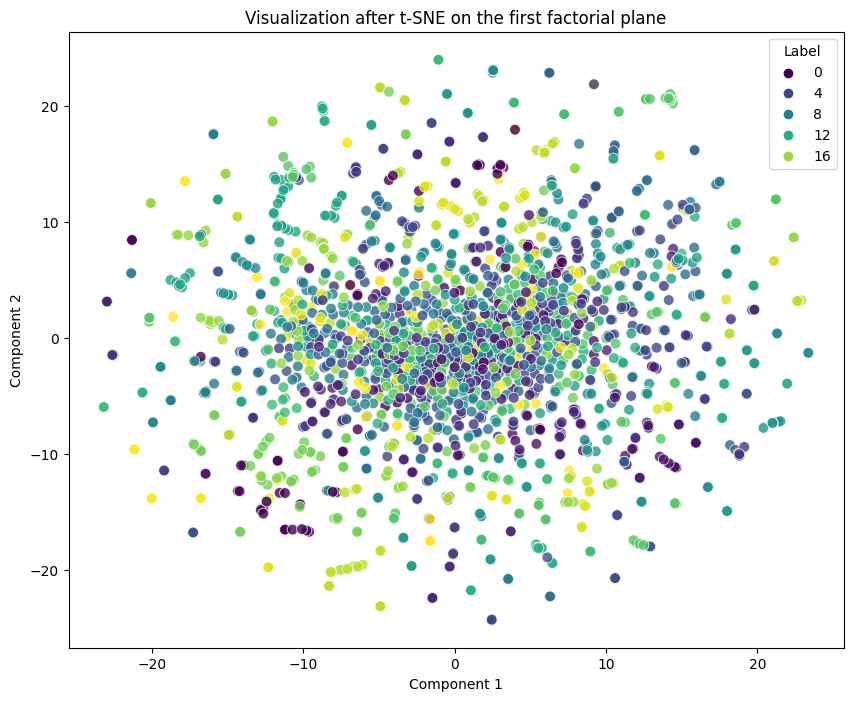

In [ ]:
# Import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# Feature extraction (replace this part with your desired feature extraction method)
# For example, you can use CountVectorizer or TF-IDF vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
embeddings = vectorizer.fit_transform(corpus).toarray()

# Perform dimensionality reduction and clustering for each method
methods = ['ACP', 'TSNE', 'UMAP']
clustering_methods = ['kmeans', 'agglomerative', 'dbscan']

for method in methods:
    for clustering_method in clustering_methods:
        # Check if data is saved, if not, compute and save it
        try:
            embeddings, red_emb, labels = load_data()
        except FileNotFoundError:
            red_emb = dim_red(embeddings, 20, method)
            save_data(embeddings, red_emb, labels, None, method, clustering_method)

        # Perform clustering
        pred = clust(red_emb, k, method=clustering_method)

        # Evaluate clustering results
        nmi_score = normalized_mutual_info_score(pred, labels)
        ari_score = adjusted_rand_score(pred, labels)

        # Print results
        print(f'Method: {method}, Clustering Method: {clustering_method}\nNMI: {nmi_score:.2f} \nARI: {ari_score:.2f}\n')

        # Save predicted labels
        save_data(embeddings, red_emb, labels, pred, method, clustering_method)

# Visualisation after PCA
plot_dimensionality_reduction(embeddings, labels, 'ACP', 'Visualization after PCA on the first factorial plane')

# Visualisation after UMAP
plot_dimensionality_reduction(embeddings, labels, 'UMAP', 'Visualization after UMAP on the first factorial plane')

# Visualisation after t-SNE
plot_dimensionality_reduction(embeddings, labels, 'TSNE', 'Visualization after t-SNE on the first factorial plane')